<a href="https://colab.research.google.com/github/alana-conti/Oficina-de-Analise-Bibliometria-PPGDR-FURB-/blob/main/An%C3%A1lise_Bibliom%C3%A9trica_Com_Todos_os_Gr%C3%A1ficos_Oficina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTIONÁRIO DETALHADO E COMPLETO PARA DESCRIÇÃO DA PESQUISA BIBLIOMÉTRICA
Mestranda: Alana Vitória Conti Deschamps

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("/content/Pesquisa_Bibliometrica1.xlsx")

## 1. Delimitação da Busca

- Qual foi o tema central da pesquisa bibliométrica?
  - Uma investigação sobre as experiências de autonomia presentes no território de Santa Catarina no período recente.
- Quais palavras-chave você utilizou para realizar a busca? (pode ser feita uma tabela com as palavras-chave, ser você quiser).
  - (("políticas públicas" OR governança OR descentralização) AND "desenvolvimento regional" AND "Santa Catarina")
  - (("economia solidária" OR cooperativismo OR autogestão) AND "Santa Catarina")
  - ("desenvolvimento regional" OR "desenvolvimento local") AND "Santa Catarina"
- Quais bases de dados, repositórios ou fontes foram consultados?
  - Scielo.
- Qual foi o período de publicação dos trabalhos analisados? (justifique o período).
  - Como as pesquisas restringiram muito os trabalhos coletados, todos os períodos encontrados foram abarcados, compreendendo de 2005 à 2021.
- Qual foi o recorte geográfico ou comunitário considerado na pesquisa? (justifique o recorte geográfico).
  - O recorte geográfico se restringe a realidade e/ou comparativos com a situação do estado de Santa Catarina.

In [ ]:
new_column_names = df.iloc[0]

df.columns = new_column_names

df = df.iloc[1:].reset_index(drop=True)

### Quantia de trabalhos coletados por conjunto de palavras-chave utilizadas (CAMINHO DA BUSCA)

/tmp/ipython-input-2720135908.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(wrapped_labels)


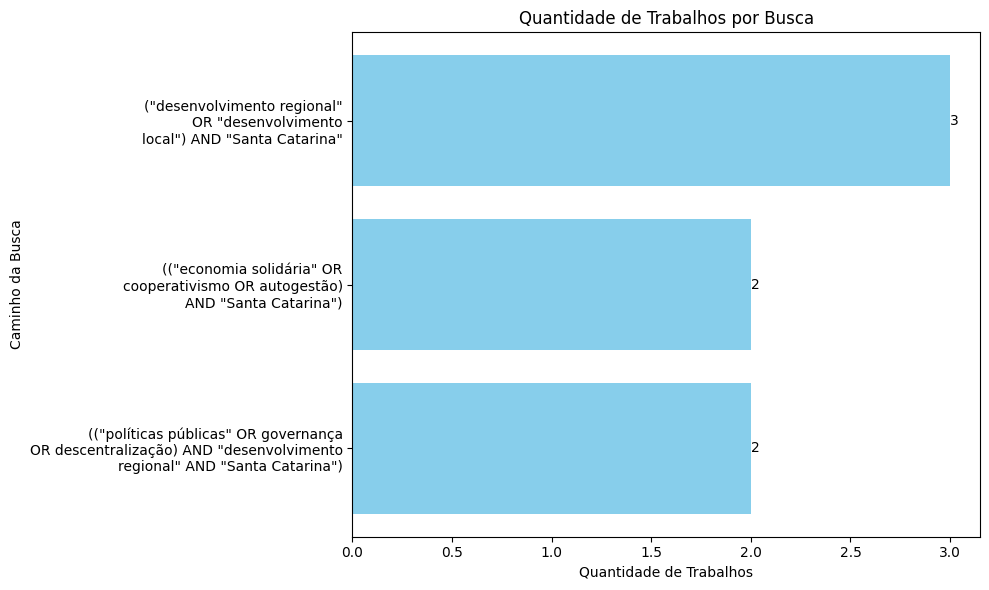

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_cleaned = df.dropna(subset=['CAMINHO DA BUSCA'])

search_path_counts = df_cleaned.groupby('CAMINHO DA BUSCA')['TÍTULO DO ARTIGO'].count().reset_index(name='Count')

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(search_path_counts['CAMINHO DA BUSCA'], search_path_counts['Count'], color='skyblue')

for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2., int(xval), va='center') # Position text next to the bar

ax.set_ylabel('Caminho da Busca')
ax.set_xlabel('Quantidade de Trabalhos')
ax.set_title('Quantidade de Trabalhos por Busca')

ax.invert_yaxis()

def wrap_labels_three_lines(label):
    words = label.split(' ')
    n_words = len(words)
    part_size = max(1, n_words // 3)
    wrapped_lines = []
    start = 0
    for i in range(3):
        end = min(start + part_size, n_words)
        if i == 2:
            end = n_words
        wrapped_lines.append(' '.join(words[start:end]))
        start = end
        if start >= n_words:
            break

    while len(wrapped_lines) < 3:
        wrapped_lines.append('')

    return '\n'.join(wrapped_lines[:3])


wrapped_labels = [wrap_labels_three_lines(label) for label in search_path_counts['CAMINHO DA BUSCA'].tolist()]
ax.set_yticklabels(wrapped_labels)


plt.tight_layout()

plt.show()

### Demonstrativo de datas das fontes coletadas

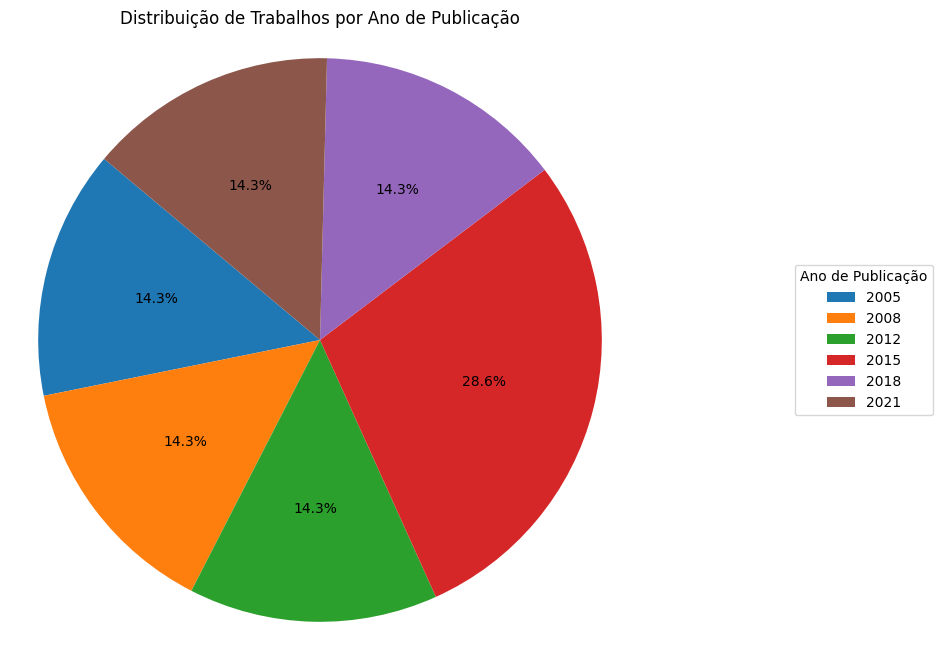

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_cleaned = df.copy()
df_cleaned = df_cleaned.dropna(axis=1, how='all')
df_cleaned.columns = df_cleaned.columns.fillna('Unknown')


df_cleaned = df_cleaned.dropna(subset=['ANO']).copy()

df_cleaned['ANO'] = pd.to_numeric(df_cleaned['ANO'], errors='coerce')

df_cleaned = df_cleaned.dropna(subset=['ANO']).reset_index(drop=True)

yearly_counts = df_cleaned.groupby('ANO').size().reset_index(name='Count')

plt.figure(figsize=(8, 8))
plt.pie(yearly_counts['Count'], labels=None, autopct='%1.1f%%', startangle=140)

plt.legend(yearly_counts['ANO'], title="Ano de Publicação", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))


plt.title('Distribuição de Trabalhos por Ano de Publicação')

plt.axis('equal')

plt.show()

## 2. Seleção e quantidade de trabalhos

- Quantos trabalhos foram encontrados na busca?
  - 7 trabalhos
- Quais foram os critérios de inclusão dos trabalhos na análise?
  - Temáticas com proximidade ao objetivo da pesquisa/que seguiam a linha pretendia, de forma que também atendesse ao critério do conjunto das palavras-chave que já eram bastante restritivas.
- Quais foram os critérios de exclusão dos trabalhos da análise?
  - Temas que fugiam a discussão da autodeterminação e das experiências de autonomia.

## 3. Caracterização dos trabalhos analisados

- Quantos artigos científicos foram incluídos na análise?
  - Sete artigos científicos
- Quantas teses de doutorado foram incluídas na análise?
  - Nenhuma
- Quantas dissertações de mestrado foram incluídas na análise?
  - Nenhuma
- Quantos relatórios ou outros tipos de documentos foram incluídos na análise?
  - Nenhum outro
- Quais instituições aparecem com maior frequência nos trabalhos analisados?
  - FURB com cinco autores, e UNOESC com dois.
- Quais autores ou orientadores aparecem com mais de um trabalho?
  - O Professor Doutor Carlos Alberto Cioce Sampaio aparece como autor de dois trabalhos

### Quantia de Trabalhos por Autor

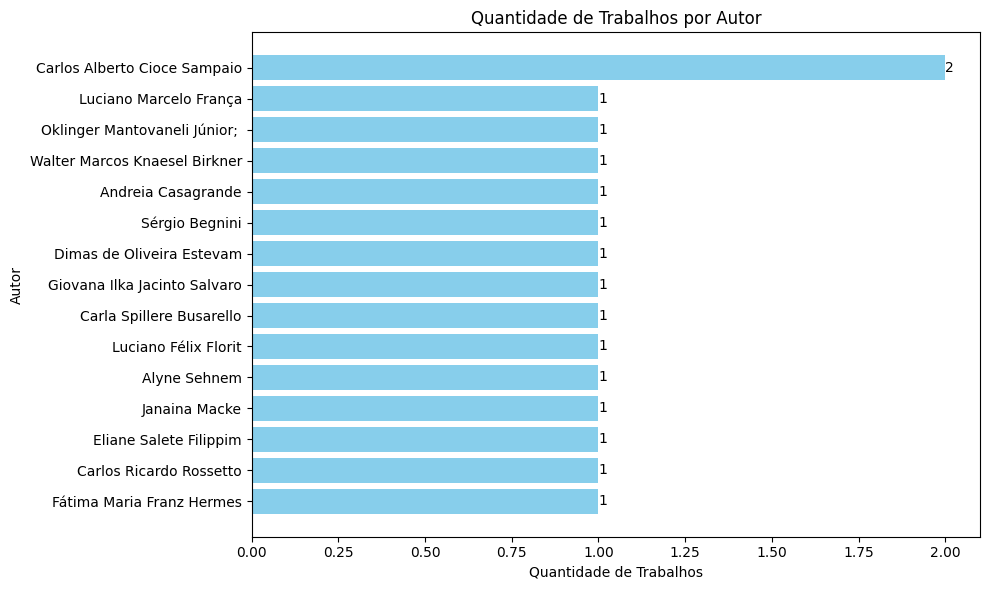

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_cleaned = df.dropna(subset=['AUTORES']).copy()

author_counts = df_cleaned['AUTORES'].value_counts().reset_index()
author_counts.columns = ['Autor', 'Count']

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(author_counts['Autor'], author_counts['Count'], color='skyblue')

for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2., int(xval), va='center')


ax.set_ylabel('Autor')
ax.set_xlabel('Quantidade de Trabalhos')
ax.set_title('Quantidade de Trabalhos por Autor')

ax.invert_yaxis()

plt.tight_layout()

plt.show()

## 4. Temas, metodologias e palavras-chave

- Quais são os temas centrais abordados nos trabalhos analisados? (pode ser feita uma tabela com os temas centrais).
  - Os temas que aparecem nos dados refletem, em sua maioria, o discurso institucionalizado ou hegemônico sobre o desenvolvimento em Santa Catarina. No entanto de maneira mais clara podemos traçar os seguintes temas:
    - Governança, Descentralização e Territorialidade	(França et al. (2012); Birkner (2008));
    - Economia Solidária e Cooperativismo	(Casagrande & Begnini (2018); Estevam et al. (2015))
    - Ética Socioambiental e Desenvolvimento Regional	(Florit & Sampaio (2021));
    - Capital Social e Desenvolvimento Local	(Sehnem & Macke (2015))
    - Gestão do Desenvolvimento Regional e Redes	(Filippim et al. (2005)).

- Quais metodologias foram mais utilizadas nos estudos analisados?
  - A abordagem metodológica predominante é o Estudo de Caso qualitativo (utilizado em 4 dos 7 artigos), muitas vezes combinado com análise documental e entrevistas. Além disso, as pesquisas tem enfoque na investigação qualitativa;
  - Especificamente:
    - França et al. (2012): Pesquisa descritiva (qualitativa), baseada em entrevistas semiestruturadas com membros do Conselho de Desenvolvimento da SDR de Blumenau e pesquisa bibliográfica.
    - Birkner (2008): Estudo comparativo (analisando os casos de MG, CE e SC) focado nas políticas públicas de descentralização.
    - Casagrande & Begnini (2018): Estudo descritivo que visa "apresentar os principais dados" dos Empreendimentos de Economia Solidária (EES), caracterizando-se como uma análise de dados/mapeamento.
    - Estevam et al. (2015): A metodologia explícita é o Estudo de Caso (das cooperativas do Sul Catarinense), utilizando entrevistas.
    - Florit & Sampaio (2021): Reflexão ético-política (ensaio teórico) sobre os conceitos de desenvolvimento e sua relação com questões ecológicas.
    - Sehnem & Macke (2015): A metodologia é um Survey (indicado como palavra-chave no CSV).
    - Filippim et al. (2005): Revisão bibliográfica e documental combinada com o "exame de dados" da atuação da Admoc (um estudo de caso documental).

- Quais palavras-chave ou conceitos aparecem com maior frequência?
  - O Território e a questão do Desenvolvimento Regional.

- Existe algum tema emergente ou pouco explorado que você identificou?
  - Dentro do espectro de trabalhos encontrados, a "Ética Socioambiental" (Florit & Sampaio, 2021) é o único tema que começa a tangenciar uma crítica ao modelo de desenvolvimento, aproximando-se da área de interesse da pesquisa, de uma forma um tanto mais próxima quanto ao nicho de investigação. No entanto, a proposta concreta da pesquisa relativa as experiências de autonomia presentes no território de Santa Catarina.

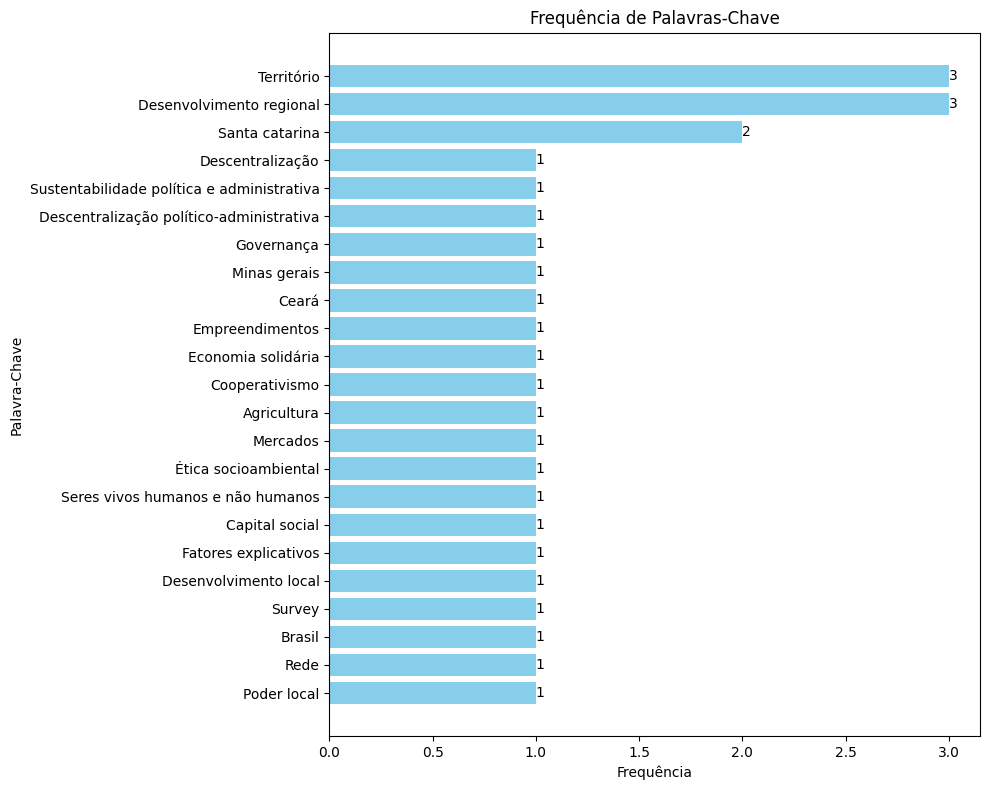

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

df_cleaned = df.copy()
df_cleaned = df_cleaned.dropna(axis=1, how='all')
df_cleaned.columns = df_cleaned.columns.fillna('Unknown')

df_cleaned = df_cleaned.dropna(subset=['PALAVRA-CHAVE']).copy()

keywords = df_cleaned['PALAVRA-CHAVE'].str.split(';').explode()

keywords = keywords.str.strip().str.lower().str.capitalize()

keyword_counts = keywords.value_counts().reset_index()
keyword_counts.columns = ['Palavra-Chave', 'Count']

fig, ax = plt.subplots(figsize=(10, 8))

bars = ax.barh(keyword_counts['Palavra-Chave'], keyword_counts['Count'], color='skyblue')

for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2., int(xval), va='center')


ax.set_ylabel('Palavra-Chave')
ax.set_xlabel('Frequência')
ax.set_title('Frequência de Palavras-Chave')

ax.invert_yaxis()

plt.tight_layout()

plt.show()

## 5. Resultados da bibliometria

- Que padrões ou tendências foram identificados na produção acadêmica analisada?
  - A produção acadêmica advinda da base de pesquisa construida sobre o território catarinense, parece focar-se massivamente na evolução dos mecanismos de gestão e integração, e não em processos de autonomia como o tema de pesquisa central se sugere a investigar. Desta forma, se trata muito mais da questão de administração do território, omitindo as práticas de ruptura, resistência e autodeterminação que constituem a autonomia real.

- Como os resultados da bibliometria ajudam a compreender a produção científica sobre experiências de autonomia e autodeterminação em Santa Catarina?
  - No caso do escopo de trabalhos coletados, a bibliometria contribuiu para a confirmação de ausência do debate da autonomia como enfoque principal dos artigos que vem sendo publicados. Desta forma, por mais que se discutam estudos de caso e comparativos de realidades, estes não se entranham no debate da autodeterminção.

- É possível identificar colaborações entre autores ou instituições?
  - As colaborações identificadas (majoritariamente acadêmicas e intra-regionais, como a FURB estudando Blumenau ou a UNESC estudando o Sul) revelam um padrão de produção de conhecimento regionalizado, o que era esperado por se tratarem de pesquisadores advindos, em sua maioria, do campo do Desenvolvimento Regional.

## 6. Documentação e rastreabilidade
- Como você documentou o processo de busca e seleção para garantir a transparência da pesquisa?
  - Registrei na tabela de dados as palavras-chave utilizadas e o link de acesso para a busca com os possíveis filtros e outras especificações de pesquisa, para que demais pesquisadores possam acessá-los.

- Existe alguma observação importante sobre dificuldades ou ajustes na busca que devem ser mencionadas no texto?
  - Acredito que o enriquecimento e flexibilização das palavras de busca são a chave para chegar nos resultados esperados. No entanto, acredito que precisaria de maior clareza e aprofundamento na área de estudo para elaborar esquemas de buscas mais precisos do que os quais fiz uso nesta coleta.

## 7. Análise da Distribuição dos Dados de Citação

- Em ambas as análises (por trabalho e por autor), devido a baixa quantia amostral, nota-se a ausência de normalidade quanto aos dados de citações. Tal cenário pode variar de acordo com a coleta de mais dados, e/ou dados mais uniformes e próximos quanto ao valor de citações.

### Análise dos dados: citações por trabalho

#### Análise de Pareto - Citações por Trabalho

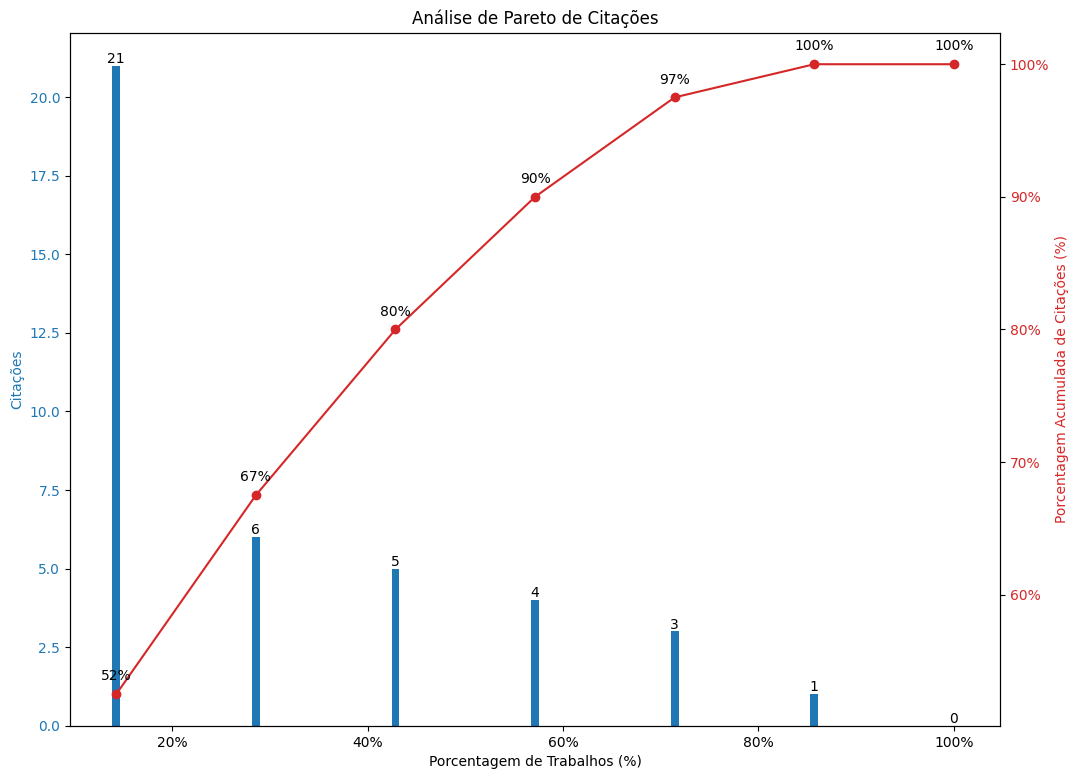

Desvio Padrão das Citações: 7.06


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

df_cleaned = df.copy()
df_cleaned = df_cleaned.dropna(axis=1, how='all')
df_cleaned.columns = df_cleaned.columns.fillna('Unknown')

citation_column_index = -2
citation_column_name_original = df_cleaned.columns[citation_column_index]
new_citation_column_name = 'Citations_Count_Unique'

cleaned_citation_data = []
for index in df_cleaned.index:
    item = df_cleaned.loc[index, citation_column_name_original]
    try:

        cleaned_citation_data.append(float(item))
    except (ValueError, TypeError):

        cleaned_citation_data.append(np.nan)

df_cleaned[new_citation_column_name] = cleaned_citation_data

unknown_cols_to_drop = [col for col in df_cleaned.columns if col.startswith('Unknown') and col != new_citation_column_name]
df_cleaned = df_cleaned.drop(columns=unknown_cols_to_drop, errors='ignore')

df_cleaned = df_cleaned.dropna(subset=['TÍTULO DO ARTIGO']).drop_duplicates(subset=['TÍTULO DO ARTIGO']).copy()

df_citations = df_cleaned.dropna(subset=[new_citation_column_name]).sort_values(by=new_citation_column_name, ascending=False).reset_index(drop=True)

if df_citations.empty:
    print("No valid numerical citation data found to generate the Pareto chart.")
    std_dev_citations = np.nan
else:
    df_citations['Cumulative_Citations'] = df_citations[new_citation_column_name].cumsum()
    df_citations['Total_Citations'] = df_citations[new_citation_column_name].sum()
    df_citations['Work_Percentage'] = (df_citations.reset_index().index + 1) / len(df_citations) * 100
    df_citations['Cumulative_Citation_Percentage'] = (df_citations['Cumulative_Citations'] / df_citations['Total_Citations']) * 100

    std_dev_citations = df_citations[new_citation_column_name].std() if len(df_citations) > 1 else np.nan

    fig, ax1 = plt.subplots(figsize=(12, 9))

    bars = ax1.bar(df_citations['Work_Percentage'], df_citations[new_citation_column_name], color='tab:blue')
    ax1.set_xlabel('Porcentagem de Trabalhos (%)')
    ax1.set_ylabel('Citações', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    for bar in bars:
        yval = bar.get_height()
        if not np.isnan(yval):
            ax1.text(bar.get_x() + bar.get_width()/2., yval, f'{int(yval)}', ha='center', va='bottom')



    ax2 = ax1.twinx()
    dots = ax2.plot(df_citations['Work_Percentage'], df_citations['Cumulative_Citation_Percentage'], color='tab:red', marker='o', linestyle='-')
    ax2.set_ylabel('Porcentagem Acumulada de Citações (%)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    for i, txt in enumerate(df_citations['Cumulative_Citation_Percentage']):
        if not np.isnan(txt):
            ax2.annotate(f'{int(txt)}%', (df_citations['Work_Percentage'].iloc[i], txt), textcoords="offset points", xytext=(0,10), ha='center')

    ax1.xaxis.set_major_formatter(mticker.PercentFormatter())

    ax2.yaxis.set_major_formatter(mticker.PercentFormatter())

    plt.title('Análise de Pareto de Citações')

    plt.show()

print(f"Desvio Padrão das Citações: {std_dev_citations:.2f}")

#### Curva de Gauss - Citações por Trabalho

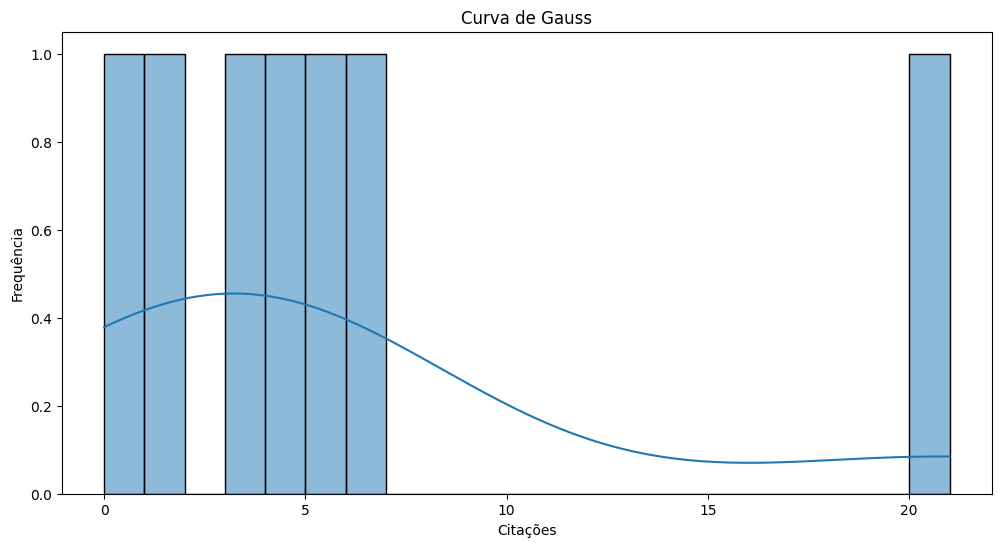

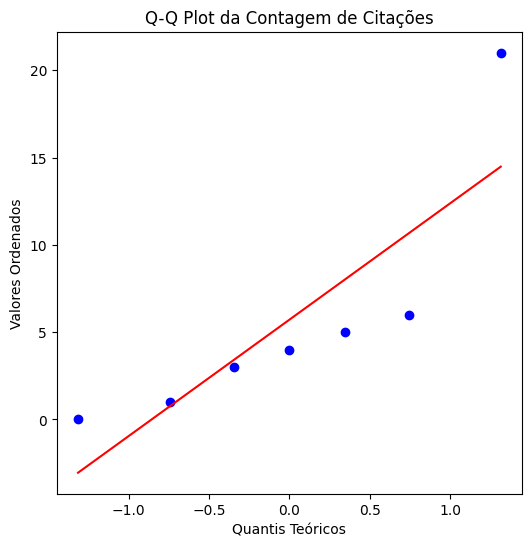


Teste de Shapiro-Wilk para Normalidade:
  Teste Estatístico: 0.7397
  P-value: 0.0099
  Com um p-value de 0.009894446209837966 (<=0.05), rejeitamos a hipótese nula.
  Os dados provavelmente não seguem uma distribuição normal.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

if df_citations.empty:
    print("Sem dados numéricos válidos de citações para a análise de distribuição.")
else:
    citation_data = df_citations['Citations_Count_Unique']

    # 1. Curva de Gauss
    plt.figure(figsize=(12, 6))
    sns.histplot(citation_data, kde=True, binwidth=1)
    plt.title('Curva de Gauss')
    plt.xlabel('Citações')
    plt.ylabel('Frequência')
    plt.show()

    # 2. Q-Q Plot
    plt.figure(figsize=(6, 6))
    stats.probplot(citation_data, dist="norm", plot=plt)
    plt.title('Q-Q Plot da Contagem de Citações')
    plt.ylabel('Valores Ordenados')
    plt.xlabel('Quantis Teóricos')
    plt.show()

    # 3. Teste estatístico para normalidade (Shapiro-Wilk)
    # Shapiro-Wilk serve para experimento com menos dados (n <= 50)
    if len(citation_data) >= 3:
        shapiro_test_stat, shapiro_p_value = stats.shapiro(citation_data)
        print(f"\nTeste de Shapiro-Wilk para Normalidade:")
        print(f"  Teste Estatístico: {shapiro_test_stat:.4f}")
        print(f"  P-value: {shapiro_p_value:.4f}")

        # Interpretando o p-value
        alpha = 0.05
        if shapiro_p_value > alpha:
            print(f"  Com um p-value de {shapiro_p_value} (>{alpha}), não podemos rejeitar a hipótese nula.")
            print("  Os dados provavelmente seguem uma distribuição normal.")
        else:
            print(f"  Com um p-value de {shapiro_p_value} (<={alpha}), rejeitamos a hipótese nula.")
            print("  Os dados provavelmente não seguem uma distribuição normal.")
    else:
        print("\nSem dados o suficiente para realizar o teste de Shapiro-Wilk.")

### Análise dos dados: citações por Autor

#### Análise de Pareto - Citações por Autor

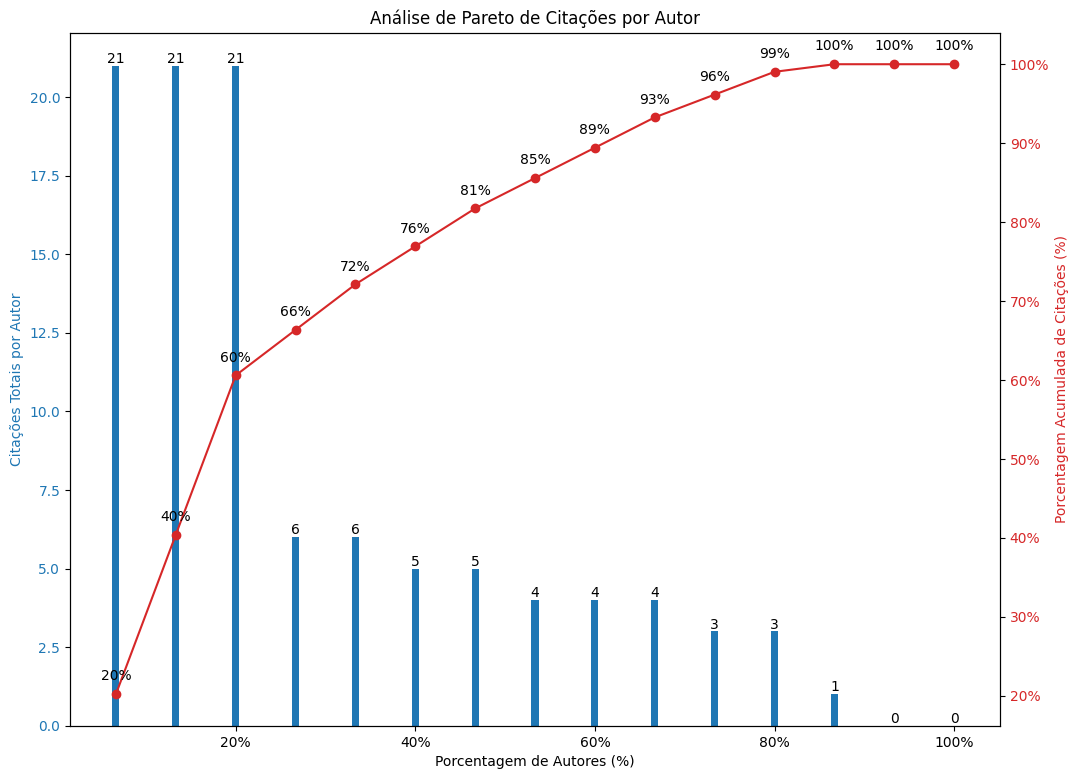

Desvio Padrão das Citações por Autor: 7.52


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

# Clean up column names initially
df_cleaned = df.copy()
df_cleaned = df_cleaned.dropna(axis=1, how='all')
df_cleaned.columns = df_cleaned.columns.fillna('Unknown')

# Identify the citation column - assuming it's the second to last column
citation_column_index = -2
citation_column_name_original = df_cleaned.columns[citation_column_index]
new_citation_column_name = 'Citations_Count_Unique' # Use a more unique name

# Manually convert each cell in the original citation column to numeric, handling errors
cleaned_citation_data = []
for index in df_cleaned.index:
    item = df_cleaned.loc[index, citation_column_name_original]
    try:
        cleaned_citation_data.append(float(item))
    except (ValueError, TypeError):
        cleaned_citation_data.append(np.nan)

# Assign the cleaned citation data as a new column
df_cleaned[new_citation_column_name] = cleaned_citation_data

# Drop the original citation column and any other 'Unknown' columns if necessary
unknown_cols_to_drop = [col for col in df_cleaned.columns if col.startswith('Unknown') and col != new_citation_column_name]
df_cleaned = df_cleaned.drop(columns=unknown_cols_to_drop, errors='ignore')


# Group by Author and sum the citation counts
# Assuming 'AUTORES' is the column containing author names
df_author_citations = df_cleaned.dropna(subset=['AUTORES', new_citation_column_name]).groupby('AUTORES')[new_citation_column_name].sum().reset_index(name='Total_Citations_by_Author')

# Sort by total citations in descending order
df_author_citations = df_author_citations.sort_values(by='Total_Citations_by_Author', ascending=False).reset_index(drop=True)


# Check if df_author_citations is empty
if df_author_citations.empty:
    print("No valid numerical citation data found for authors to generate the Pareto chart.")
    std_dev_citations = np.nan
else:
    # Calculate cumulative percentage of citations and authors for Pareto analysis
    df_author_citations['Cumulative_Citations'] = df_author_citations['Total_Citations_by_Author'].cumsum()
    df_author_citations['Total_Citations'] = df_author_citations['Total_Citations_by_Author'].sum()
    df_author_citations['Author_Percentage'] = (df_author_citations.reset_index().index + 1) / len(df_author_citations) * 100
    df_author_citations['Cumulative_Citation_Percentage'] = (df_author_citations['Cumulative_Citations'] / df_author_citations['Total_Citations']) * 100

    # Calculate the standard deviation of citations by author
    std_dev_citations = df_author_citations['Total_Citations_by_Author'].std() if len(df_author_citations) > 1 else np.nan


    # Create a Matplotlib figure and a twin axis
    fig, ax1 = plt.subplots(figsize=(12, 9))

    # Plot the bars on the primary axis (left y-axis)
    bars = ax1.bar(df_author_citations['Author_Percentage'], df_author_citations['Total_Citations_by_Author'], color='tab:blue')
    ax1.set_xlabel('Porcentagem de Autores (%)')
    ax1.set_ylabel('Citações Totais por Autor', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Add text labels above the bars
    for bar in bars:
        yval = bar.get_height()
        if not np.isnan(yval): # Only add label if the height is not NaN
            ax1.text(bar.get_x() + bar.get_width()/2., yval, f'{int(yval)}', ha='center', va='bottom')


    # Create a secondary axis for the line plot (right y-axis)
    ax2 = ax1.twinx()
    dots = ax2.plot(df_author_citations['Author_Percentage'], df_author_citations['Cumulative_Citation_Percentage'], color='tab:red', marker='o', linestyle='-')
    ax2.set_ylabel('Porcentagem Acumulada de Citações (%)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Add text labels above the dots
    for i, txt in enumerate(df_author_citations['Cumulative_Citation_Percentage']):
        if not np.isnan(txt): # Only add label if the value is not NaN
            ax2.annotate(f'{int(txt)}%', (df_author_citations['Author_Percentage'].iloc[i], txt), textcoords="offset points", xytext=(0,10), ha='center')


    # Format x-axis as percentage
    ax1.xaxis.set_major_formatter(mticker.PercentFormatter())

    # Format y-axis of the second axis as percentage
    ax2.yaxis.set_major_formatter(mticker.PercentFormatter())

    # Add a title
    plt.title('Análise de Pareto de Citações por Autor')

    # Show the plot
    plt.show()

print(f"Desvio Padrão das Citações por Autor: {std_dev_citations:.2f}")

#### Curva de Gauss - Citações por Autor

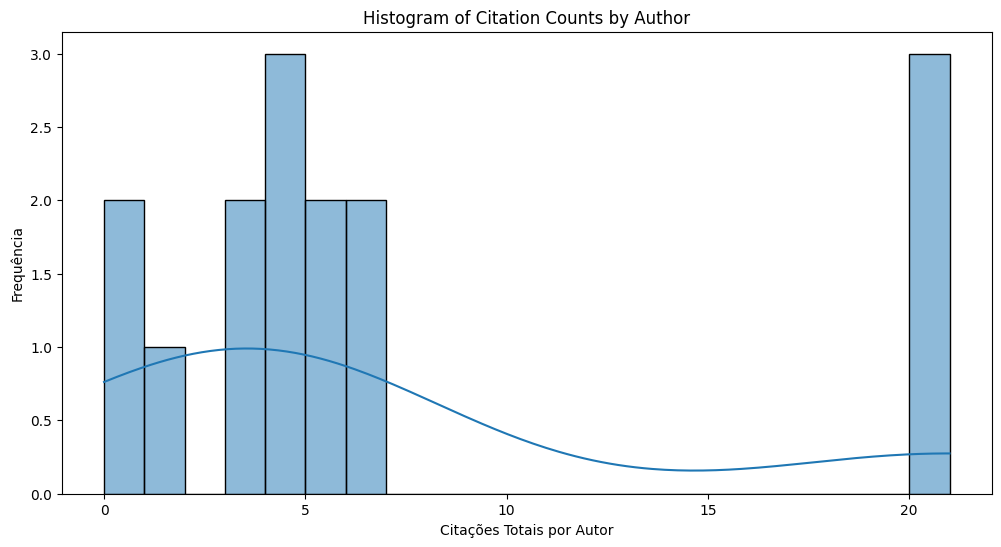

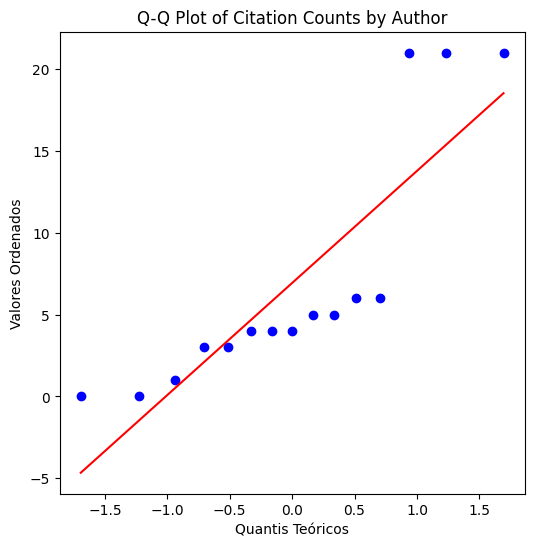


Teste de Shapiro-Wilk para Normalidade (por Autor):
  Teste Estatístico: 0.7188
  P-value: 0.0004
  Com um p-value de 0.0004 (<=0.05), rejeitamos a hipótese nula.
  Os dados provavelmente não seguem uma distribuição normal.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

if df_author_citations.empty:
    print("No valid numerical citation data found for authors for distribution analysis.")
else:
    citation_data = df_author_citations['Total_Citations_by_Author']

    plt.figure(figsize=(12, 6))
    sns.histplot(citation_data, kde=True, binwidth=1)
    plt.title('Histogram of Citation Counts by Author')
    plt.xlabel('Citações Totais por Autor')
    plt.ylabel('Frequência')
    plt.show()

    plt.figure(figsize=(6, 6))
    stats.probplot(citation_data, dist="norm", plot=plt)
    plt.title('Q-Q Plot of Citation Counts by Author')
    plt.ylabel('Valores Ordenados')
    plt.xlabel('Quantis Teóricos')
    plt.show()


    if len(citation_data) >= 3:
        shapiro_test_stat, shapiro_p_value = stats.shapiro(citation_data)
        print(f"\nTeste de Shapiro-Wilk para Normalidade (por Autor):")
        print(f"  Teste Estatístico: {shapiro_test_stat:.4f}")
        print(f"  P-value: {shapiro_p_value:.4f}")

        # Interpretando o p-value
        alpha = 0.05
        if shapiro_p_value > alpha:
            print(f"  Com um p-value de {shapiro_p_value:.4f} (>{alpha}), não podemos rejeitar a hipótese nula.")
            print("  Os dados provavelmente seguem uma distribuição normal.")
        else:
            print(f"  Com um p-value de {shapiro_p_value:.4f} (<={alpha}), rejeitamos a hipótese nula.")
            print("  Os dados provavelmente não seguem uma distribuição normal.")
    else:
        print("\nSem dados o suficiente (ao menos 3 pontos) para realizar o teste de Shapiro-Wilk para normalidade por autor.")